In [1]:
# Import necesssary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Importing the data

In [4]:
plastic = pd.read_csv("D:\Data science\Assignments docs\Forecasting\PlasticSales.csv")
plastic.head()

,Month,Sales
0,01-01-1949,742
1,01-02-1949,697
2,01-03-1949,776
3,01-04-1949,898
4,01-05-1949,1030


In [5]:
plastic.shape

(60, 2)

In [6]:
plastic.describe()

,Sales
count,60.000000
mean,1162.366667
std,266.431469
min,697.000000
25%,947.750000
50%,1148.000000
75%,1362.500000
max,1637.000000


In [7]:
plastic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   60 non-null     object
 1   Sales   60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [8]:
# Checking NA values in the dataset

In [9]:
plastic.isna().sum()

Month    0
Sales    0
dtype: int64

#### There are no NA values in the dataset

In [11]:
from pandas import datetime

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


### Converting the 'month' from object type to 'datetime' format

In [12]:
month = []
for date in plastic["Month"]:
    values = datetime.strptime(date,"%d-%m-%Y")
    month.append(values)

In [13]:
plastic["month"] = month

In [14]:
plastic.head()

,Month,Sales,month
0,01-01-1949,742,1949-01-01
1,01-02-1949,697,1949-02-01
2,01-03-1949,776,1949-03-01
3,01-04-1949,898,1949-04-01
4,01-05-1949,1030,1949-05-01


In [15]:
plastic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   60 non-null     object        
 1   Sales   60 non-null     int64         
 2   month   60 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.5+ KB


In [16]:
# Dropping original object type month

In [17]:
plastic = plastic.drop(columns=["Month"],axis=1)

In [18]:
plastic.head()

,Sales,month
0,742,1949-01-01
1,697,1949-02-01
2,776,1949-03-01
3,898,1949-04-01
4,1030,1949-05-01


### Converting 'month' column as index

In [19]:
plastic.set_index('month', inplace=True)

In [20]:
plastic.head()

,Sales
month,
1949-01-01,742
1949-02-01,697
1949-03-01,776
1949-04-01,898
1949-05-01,1030


## Visualizing the data

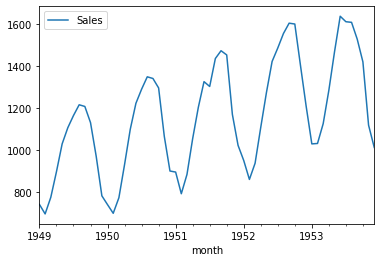

In [21]:
plastic.plot()

### Testing for stationarity

In [22]:
from statsmodels.tsa.stattools import adfuller

In [23]:
# Defining a function for ADF test

In [24]:
def adfuller_test(sales):
    result = adfuller(sales)
    labels = ['ADF Test statistic','p-values','#Lags Used','Number of observations used'] 
    for value, label in zip(result, labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("The data is stationary")
    else:
        print("The data is not stationary")

In [25]:
adfuller_test(plastic['Sales'])

ADF Test statistic : -0.7425639844129035
p-values : 0.8354143931554409
#Lags Used : 10
Number of observations used : 49
The data is not stationary


#### Since the data is not stationary, we have to difference it to make it stationary

In [26]:
plastic_diff = plastic.diff(periods=1)

In [27]:
plastic_diff.head()

,Sales
month,
1949-01-01,NaN
1949-02-01,-45.0
1949-03-01,79.0
1949-04-01,122.0
1949-05-01,132.0


### Again testing using dickey fuller test

In [28]:
adfuller_test(plastic_diff['Sales'].dropna())

ADF Test statistic : -1.1183843311541333
p-values : 0.7076850425725206
#Lags Used : 11
Number of observations used : 47
The data is not stationary


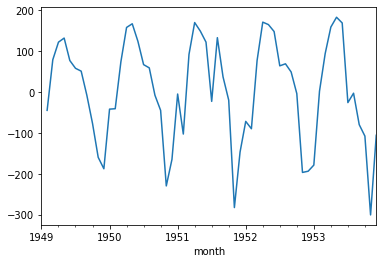

In [29]:
plastic_diff['Sales'].plot()

#### The p-value is still higher and its not stationary after first order differentiation, hence going for 2nd order differentiation

In [30]:
# Another order of differentiation

In [31]:
plastic_diff2 = plastic_diff.diff(periods=1)

In [32]:
plastic_diff2.head()

,Sales
month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,124.0
1949-04-01,43.0
1949-05-01,10.0


### Again testing using dickey fuller test

In [33]:
adfuller_test(plastic_diff2['Sales'].dropna())

ADF Test statistic : -10.95611514875864
p-values : 8.553998742214738e-20
#Lags Used : 10
Number of observations used : 47
The data is stationary


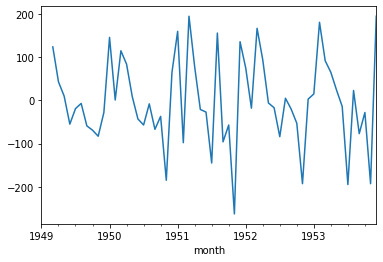

In [34]:
plastic_diff2['Sales'].plot()

#### The data has become stationary after 2nd order of differentiation

In [35]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

### Plotting auto correlation and partial correlation plot

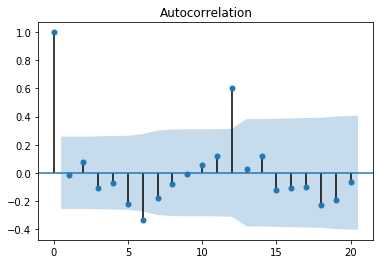

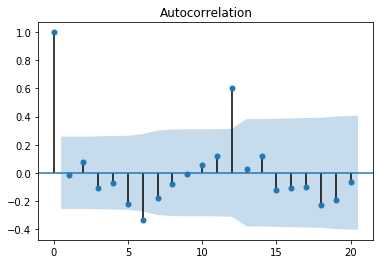

In [36]:
plot_acf(plastic_diff2['Sales'].dropna(),lags=20)

#### The 'q' value for ARIMA model can be taken as 0 referring the above plot

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


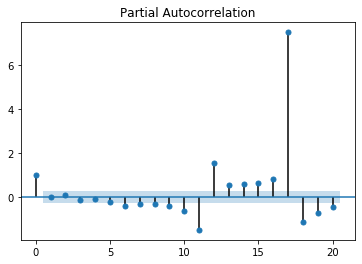

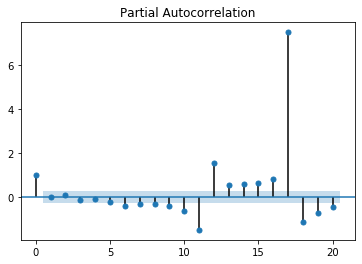

In [37]:
plot_pacf(plastic_diff2['Sales'].dropna(),lags=20)

#### The 'p' value for ARIMA model can be taken as 0 referring the above plot

## Model building

In [38]:
from statsmodels.tsa.arima_model import ARIMA

In [39]:
model=ARIMA(plastic['Sales'],order=(0,2,0))
model_fit=model.fit()

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS wi

In [40]:
model_fit.aic

705.8421198982761

In [41]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D2.Sales   No. Observations:                   58
Model:                 ARIMA(0, 2, 0)   Log Likelihood                -350.921
Method:                           css   S.D. of innovations            102.660
Date:                Wed, 28 Oct 2020   AIC                            705.842
Time:                        00:08:55   BIC                            709.963
Sample:                    03-01-1949   HQIC                           707.447
                         - 12-01-1953                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0517     13.480     -0.078      0.938     -27.472      25.368
==============================================================================
"""

In [42]:
# Checking other values for p,d,q for which the AIC should be the lowest

In [43]:
p=0
d=2
q=0

In [44]:
pdq=[]
aic=[]

In [45]:
import warnings
warnings.filterwarnings('ignore')
for q in range(9):
    try:
        model=ARIMA(plastic.Sales, order=(p,d,q)).fit(disp=0)
        x= model.aic
        x1=p,d,q
        aic.append(x)
        pdq.append(x1)
    except:
        pass

keys=pdq
values=aic
d=dict(zip(keys,values))
print(d)

{(0, 2, 0): 705.8421198982761, (0, 2, 1): 707.8328185216869, (0, 2, 2): 709.3790845787385, (0, 2, 3): 701.6428435105047, (0, 2, 4): 702.2574937851018, (0, 2, 5): 702.1421869852454, (0, 2, 6): 703.9649031759229}


#### For order of (0,2,3) AIC value is least at 701.64, hence building model at this order

In [46]:
model=ARIMA(plastic['Sales'],order=(0,2,3))
model_fit=model.fit()

In [47]:
model_fit.aic

701.6428435105047

### Predicting the values for this model

In [48]:
plastic.shape

(60, 1)

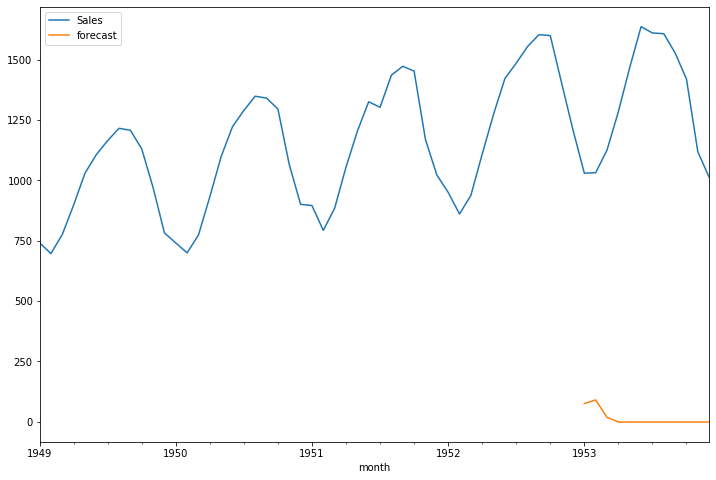

In [49]:
plastic['forecast']=model_fit.predict(start=48,end=61,dynamic=True)
plastic[['Sales','forecast']].plot(figsize=(12,8))

### Using the SARIMAX to predict the values for seasonal data

In [50]:
import statsmodels.api as sm

In [51]:
model=sm.tsa.statespace.SARIMAX(plastic['Sales'],order=(0, 2, 3),seasonal_order=(0,2,3,12))
results=model.fit()

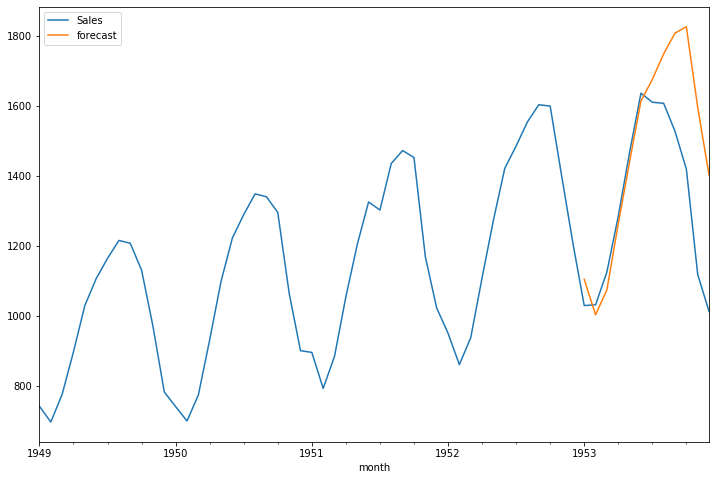

In [52]:
plastic['forecast']=results.predict(start=48,end=61,dynamic=True)
plastic[['Sales','forecast']].plot(figsize=(12,8))

#### Forecasted value is very similar to the acutal values, hence the model is good

### Forecasting the future values

In [53]:
from pandas.tseries.offsets import DateOffset
future_dates=[plastic.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [54]:
len(future_dates)

24

In [55]:
future_dates_df=pd.DataFrame(index=future_dates[1:],columns=plastic.columns)

In [56]:
future_dates_df

,Sales,forecast
1954-01-01,NaN,NaN
1954-02-01,NaN,NaN
1954-03-01,NaN,NaN
1954-04-01,NaN,NaN
1954-05-01,NaN,NaN
1954-06-01,NaN,NaN
1954-07-01,NaN,NaN
1954-08-01,NaN,NaN
1954-09-01,NaN,NaN
1954-10-01,NaN,NaN


In [57]:
future_df=pd.concat([plastic,future_dates_df], axis=0)

In [58]:
future_df.shape

(83, 2)

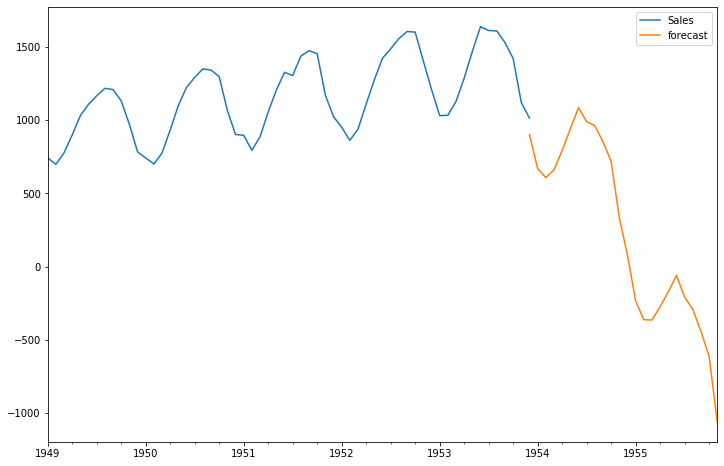

In [62]:
future_df['forecast'] = results.predict(start = 59, end = 83, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8))

#### The forecasted values looks good as it follows both trend and seasonality of original data

In [63]:
# Forecasted values of 2 future years

In [64]:
future_df['forecast'].iloc[59:]

1953-12-01     900.955615
1954-01-01     667.799798
1954-02-01     606.443359
1954-03-01     659.784798
1954-04-01     791.852867
1954-05-01     938.713958
1954-06-01    1084.353505
1954-07-01     988.669586
1954-08-01     961.233560
1954-09-01     851.253969
1954-10-01     718.382506
1954-11-01     333.515572
1954-12-01      78.183211
1955-01-01    -235.259052
1955-02-01    -362.952164
1955-03-01    -365.144132
1955-04-01    -274.768683
1955-05-01    -173.073989
1955-06-01     -60.430647
1955-07-01    -209.968906
1955-08-01    -292.400816
1955-09-01    -443.396002
1955-10-01    -612.797677
1955-11-01   -1061.608537
Name: forecast, dtype: float64